**"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.**

# Beautifulsoup

* pip install beautifulsoup4
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# Data Source: Coffee Review
- Use Google Chrome for the following:
- Go to http://www.coffeereview.com/review/page/1/ (1st page of coffee reviews from 1997 to 2018)
- Information: product, brand, rating, company location, coffee origin, roast level, price, review data and data characteristics such as agtron, aroma, acidity and body, etc.

## Why Coffee Review and How does it work?
* Leading third-party revew website for coffee. It use to be the only one third-party review website for years.
* Over 1 million unique visitors a year.
* Coffees are tasted blind using SCAA (Specialty Coffee Association of America) cupping protocols which gives the most accurately assessment on the quality of the coffee (see http://www.scaa.org/?page=resources&d=cupping-protocols).
* Originated the 100-point coffee rating system. SCAA and the Cup of Excellence both began using 100-point scale rating one or two year later than Coffee Review.
* References: https://templecoffee.com/what-is-coffee-review-and-how-does-it-work/
http://www.coffeereview.com/how-coffee-review-works/


## How are Coffees Evaluated?
* They do not evaluate coffee on the basis of what is cool and fashionable.
* They do not evaluate coffee on the basis of socio-economic and environmental background of the coffee production.
* They only make sensory evaluation of coffee which follows **global coffee community assumptions**:
   1. The acidy sensation in coffee is fundamentally good, so long as it is not harsh, overbearing, or astringent.
   2. Smoothly viscous or lightly syrupy/silky mouthfeel is better than thin, watery, or silty mouthfeel.
   3. Aromatic and flavor notes that are complex and relatively intense are better than those that are simple or faded.
   4. Aromatic and flavor notes that are complex and relatively intense are better than those that are simple or faded.
   5. Aromas and flavors that develop naturally from the coffee bean itself when skillfully processed and roasted, like floral, fruit, citrus, honey, molasses, and chocolate, are better than flavors that come from mistakes made during fruit removal and drying, such as the taste of rotten fermented fruit, mustiness or moldiness, or medicinal flavors.
   6. A long, sweet, flavor-saturated aftertaste is better than a short, fast-fading, astringent or aromatically empty aftertaste. 

## Rating System in Coffee Review:

* 85/86 = An acceptable coffee, but nothing exceptional — the best high-end supermarket whole bean, for example

* 87-88 = An interesting coffee but either 1) distinctive yet mildly flawed, or 2) solid but not exciting

* 89-90 = A very good coffee, drinkable, with considerable distinction and interest

* 91-92 = An exceptional, solid coffee with some excitement and distinction in aroma and flavor – or a super-exceptional coffee that still perhaps has some issue that some consumers may object to but others will love – a big, slightly imbalanced acidity, for example, or an overly lush fruit

* 93-94 = Exceptional originality, beauty, individuality and distinction, with no negative issues whatsoever

* 95-96 = Perfect in structure, flawless, and shockingly distinctive and beautiful

* 97+ = Means: “We have not tasted a coffee of this style as splendid as this one for a long, long time”
* I follow this rating system to make the rating cutoffs in the following.

# Business Questions

In [ ]:
* Whether coffee have been evaluated according to Coffee Review's global coffee community assumption?
* Where are the coffee roasters? How many U.S. coffee have been evaluated?
* Do Kansas and Missouri have good coffee?
* 

# Data Identification and Collection

In [1]:
# import python packages
import requests
import re
import csv
import pandas as pd
import urllib
import urllib2
from multiprocessing.dummy import Pool
import os
import shutil
import time
import json
import glob
from lxml import html
from bs4 import BeautifulSoup, SoupStrainer
from lxml.html import parse
import sys
from time import sleep

## Web scrape one product (Expresso Republic -Static Peru Cajamarca)
* link: http://www.coffeereview.com/review/static-peru-cajamarca/

 ** Pull the nested structure of the html file**

In [2]:
site= "http://www.coffeereview.com/review/static-peru-cajamarca/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = urllib2.Request(site,headers=hdr)
page = urllib2.urlopen(req)
soup = BeautifulSoup(page)

C:\ProgramData\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\ProgramData\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


 ** collect information and save it into a dataframe **

In [3]:
site= "http://www.coffeereview.com/review/static-peru-cajamarca/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = urllib2.Request(site,headers=hdr)
page = urllib2.urlopen(req)
soup = BeautifulSoup(page,"lxml")
rating='Rating: '+soup.find('div', {'class': "review-rating"}).contents[0]
product='Product: '+soup.find('h2', {'class': "review-title"}).contents[0]
brand='Brand: '+soup.find('h3').contents[0]
prodinfo= [item.text for item in soup.find('div',{'class': "review-col1"}).findAll('p')]
tasteinfo= [item.text for item in soup.find('div',{'class': "review-col2"}).findAll('p')]
assess= ['Assessment: '+ p.findNext('p').text for p in soup.findAll('p',{'class': "subtitle"})[0]]
note= ['Notes: '+ p.findNext('p').text for p in soup.findAll('p',{'class': "subtitle"})[1]]
bottomline=[item.findNext('p').findNext('p').text for item in soup.findAll('p',{'class': "subtitle"})[1]]
link=['Link: '+item.findNext('p').a.get('href') for item in soup.findAll('p',{'class': "subtitle"})[1]]

In [4]:
data_p1 = pd.DataFrame([product,brand, rating]).T
data_p1

,0,1,2
0,Product: Static Peru Cajamarca,Brand: Espresso Republic,Rating: 89


In [5]:
data_p2= pd.DataFrame(list(prodinfo+tasteinfo)).T
data_p2

,0,1,2,3,4,5,6,7,8,9,10
0,"Location: Chino, California",Origin: Peru,Roast: Medium-Light,Est. Price: $12.00/12 ounces,Review Date: April 2018,Agtron: 60/75,Aroma: 8,Acidity/Structure: 8,Body: 8,Flavor: 8,Aftertaste: 7


In [6]:
data_p3=pd.DataFrame(assess+note+link).T
data_p3

,0,1,2
0,Assessment: Quietly and delicately crisp. Cand...,Notes: From Cenfrocafe Cooperative in northern...,Link: http://www.espressorepublic.com/


In [7]:
df=pd.concat([data_p1,data_p3,data_p2],axis=1)
df

,0,1,2,0,1,2,0,1,2,3,4,5,6,7,8,9,10
0,Product: Static Peru Cajamarca,Brand: Espresso Republic,Rating: 89,Assessment: Quietly and delicately crisp. Cand...,Notes: From Cenfrocafe Cooperative in northern...,Link: http://www.espressorepublic.com/,"Location: Chino, California",Origin: Peru,Roast: Medium-Light,Est. Price: $12.00/12 ounces,Review Date: April 2018,Agtron: 60/75,Aroma: 8,Acidity/Structure: 8,Body: 8,Flavor: 8,Aftertaste: 7


## Webcrawling the full website for all reviews

* There are 243 pages of reviews in this website.

### Get all the hyperlinks of coffee

In [8]:
finallink = []
linkp1 ="http://www.coffeereview.com/review/page/%s"
for i in range(1,244):
    link= linkp1 %i
    
    hdr_link= {'User-Agent': 'Mozilla/5.0'}
    req_link = urllib2.Request(link,headers=hdr_link)
    page_link = urllib2.urlopen(req_link)
    soup_link = BeautifulSoup(page_link)
    for item in soup_link.findAll('h2',{'class': "review-title"}):
        plink= item.a.get('href')
        finallink.append([plink])
len(finallink) 

4860

In [9]:
#save all the links into a dataframe.
df_finallink = pd.DataFrame(finallink)
df_finallink.head(2)

,0
0,http://www.coffeereview.com/review/tumba-rwanda/
1,http://www.coffeereview.com/review/mandheling-...


In [10]:
# save dataframe into a excel worksheet.
df_finallink.to_csv("df_finallink.csv", encoding='utf-8')

In [11]:
for item in df_finallink[0][90:100]:
    hdr_test= {'User-Agent': 'Mozilla/5.0'}
    req_test = urllib2.Request(item,headers=hdr_test)
    page_test = urllib2.urlopen(req_test)
    soup_test = BeautifulSoup(page_test,"lxml-xml")
len(soup_test)

2

### Get all the required information from the hyperlinks of coffee

In [12]:
dataAll2 = []

for item in df_finallink[0]:
    hdr2= {'User-Agent': 'Mozilla/5.0'}
    req2 = urllib2.Request(item,headers=hdr2)
    page2 = urllib2.urlopen(req2)
    soup2 = BeautifulSoup(page2)
    
    for item in soup2:
        product='Product: '+soup2.find('h2', {'class': "review-title"}).contents[0]
        rating='Rating: '+soup2.find('div', {'class': "review-rating"}).contents[0]
        brand='Brand: '+soup2.find('h3').contents[0]
        prodinfo= [item.text for item in soup2.find('div',{'class': "review-col1"}).findAll('p')]
        tasteinfo= [item.text for item in soup2.find('div',{'class': "review-col2"}).findAll('p')]
        assess= ['Assessment: '+ p.findNext('p').text for p in soup2.findAll('p',{'class': "subtitle"})[0]]
        note= ['Notes: '+ p.findNext('p').text for p in soup2.findAll('p',{'class': "subtitle"})[1]]
        bottomline=[item.findNext('p').findNext('p').text for item in soup2.findAll('p',{'class': "subtitle"})[1]]
        data_p1 = pd.DataFrame([product,brand, rating]).T
        data_p2= pd.DataFrame(list(prodinfo+tasteinfo)).T
        data_p3= pd.DataFrame(assess+note+bottomline).T
        df=pd.concat([data_p1,data_p3,data_p2],axis=1,ignore_index=True)
        df.index = df.index.astype(str) 
        le=str(df.reset_index().values.tolist())
        s = le.replace('[', '')
        s =s.replace(']', '')
        s= s.replace("'0',", '')
        s= s.replace("u'", '')
        s= s.replace("'", '')
        dataAll2.append(s)

df_All_2 = pd.DataFrame(dataAll2)
df_All_2.to_csv("df_All_full.csv", encoding='utf-8')

### Data cleaning

In [13]:
df= pd.read_csv('df_All_full.csv')
df.shape

(14580, 2)

In [14]:
df['0'].head()
df['0'].to_csv("full_copy.csv", encoding='utf-8')

In [15]:
df_2=pd.read_csv('full_copy.csv', header=None)
df_2.head()

,0,1
0,0,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
1,1,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
2,2,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
3,3,"Product: Mandheling Onan Ganjang, Brand: Kaka..."
4,4,"Product: Mandheling Onan Ganjang, Brand: Kaka..."


In [16]:
df_new=df_2[1]
df_new=pd.DataFrame(df_new)
df_new.head()

,1
0,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
1,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
2,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
3,"Product: Mandheling Onan Ganjang, Brand: Kaka..."
4,"Product: Mandheling Onan Ganjang, Brand: Kaka..."


In [17]:
# Notice that there are a lot of duplicates in the dataframe. This is due to the parser I am used in the BeautifulSoup.
# So, we need to drop duplciates.

t=df_new.drop_duplicates(subset=[1])
t.head()

,1
0,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
3,"Product: Mandheling Onan Ganjang, Brand: Kaka..."
6,"Product: Burundi Nemba, Brand: Amavida Coffee..."
9,"Product: Static Peru Cajamarca, Brand: Espres..."
12,"Product: Ethiopia Banko Gotiti Natural, Brand..."


In [18]:
t.to_csv("coffeecleaned.csv", encoding='utf-8')

In [19]:
t_new = pd.DataFrame(t.reset_index()[1])
t_new.head()

,1
0,"Product: Tumba Rwanda, Brand: Corvus Coffee R..."
1,"Product: Mandheling Onan Ganjang, Brand: Kaka..."
2,"Product: Burundi Nemba, Brand: Amavida Coffee..."
3,"Product: Static Peru Cajamarca, Brand: Espres..."
4,"Product: Ethiopia Banko Gotiti Natural, Brand..."


In [20]:
t1=t_new[1].str.split('Product:|u"Product:', expand=True)
t2=t1[1].str.split(', Brand: |, u"Brand:', expand=True)
t_new['product']=t2[0]
t3=t2[1].str.split(', Rating: |, u"Rating:', expand=True)
t_new['brand']=t3[0]
t4=t3[1].str.split(', Assessment: |, u"Assessment:', expand=True)
t_new['rating']=t4[0]
t5=t4[1].str.split(', Notes:|, u"Notes:', expand=True)
t_new['assessment']=t5[0]
t6=t5[1].str.split(', The Bottom Line:|, u"The Bottom Line:|, Who Should Drink It:|, u"Who Should Drink It:', expand=True)
t_new['note']=t6[0]
t7=t6[1].str.split(', Location:|, u"Location:|Location:', expand=True)
t_new['bottomline']=t7[0]
t8=t7[1].str.split(', Origin:|, u"Origin:', expand=True)
t_new['location']=t8[0]
t9=t8[1].str.split(', Roast:|, u"Roast:', expand=True)
t_new['origin']=t9[0]
t10=t9[1].str.split(', Est. Price:| , u"Est. Price: ', expand=True)
t_new['roast']=t10[0]
t11=t10[1].str.split(', Review Date:| , u"Review Date: ', expand=True)
t_new['est_price']=t11[0]
t12=t11[1].str.split(', Agtron:| , u"Agtron: ', expand=True)
t_new['review_date']=t12[0]
t_new.head()

,1,product,brand,rating,assessment,note,bottomline,location,origin,roast,est_price,review_date
0,"Product: Tumba Rwanda, Brand: Corvus Coffee R...",Tumba Rwanda,Corvus Coffee Roasters,93,"Resonant, sweet-savory, original. Baker\u2019s...",From the Tumba washing station or wet mill op...,Lovely expression of the genius of Rwanda cof...,"Denver, Colorado",Rwanda,Light,$15.50/12 ounces,May 2018
1,"Product: Mandheling Onan Ganjang, Brand: Kaka...",Mandheling Onan Ganjang,Kakalove Cafe,94,"Deeply sweet, richly earth-toned. Dark chocola...",Produced in the Lintong region south of Lake...,A sweet yet umami-leaning Sumatra cup (think ...,"Chia-Yi, Taiwan","Lintong growing region, North Sumatra Provinc...",Medium-Light,NT $550/16 ounces,May 2018
2,"Product: Burundi Nemba, Brand: Amavida Coffee...",Burundi Nemba,Amavida Coffee Roasters,93,"Delicately rich, vibrantly sweet-savory. Wiste...","Burundi is a small, landlocked country in th...","A floral- and spice-toned Burundi cup, simult...","Santa Rosa Beach, Florida","Kayanza, Kabuye, Burundi",Medium-Light,$16.95/12 ounces,May 2018
3,"Product: Static Peru Cajamarca, Brand: Espres...",Static Peru Cajamarca,Espresso Republic,89,"Quietly and delicately crisp. Candied walnut, ...",From Cenfrocafe Cooperative in northern Peru....,"A delicately brisk, sweetly nut-toned variati...","Chino, California",Per,Medium-Light,$12.00/12 ounces,April 2018
4,"Product: Ethiopia Banko Gotiti Natural, Brand...",Ethiopia Banko Gotiti Natural,Coffee Please,94,"High-toned, deeply sweet. Honeysuckle, blackbe...",Southern Ethiopia coffees like this one are p...,"A brightly sweet, crisply tart natural-proces...","Taipei, Taiwan","Yirgacheffe growing region, south-central Eth...",Light,NT $700/16 ounces,April 2018


** Now, deal with the coffee characteristics: **

In [21]:
#agtron
t_new['agtron']=t_new[1].str.extract('Agtron: (\d+\/\d+)',expand=False)
t_new['agtron_wholebean']=t_new[1].str.extract('Agtron: (\d+)',expand=False)
t_new['agtron_ground']=t_new['agtron'].str.extract('/(\d+)',expand=False)

* Agtron uses “near-infrared abridged Spectrophotometers” to reflect light on a sample of coffee in order to assign a specific value, which we read as a number. The smaller the number, the darker the roast. The two numbers represent the whole bean and ground color value for each coffee.  (See : http://www.coffeereview.com/agtron-numerology/)

In [22]:
# other characteristics: acidity, aroma, body, flavor, aftertaste, and with milk.
t_new['acidity']=t_new[1].str.extract('Acidity:|Acidity/Structure: (\d+)?',expand=False)
t_new['aroma']=t_new[1].str.extract('Aroma: (\d+)?',expand=False)
t_new['body']=t_new[1].str.extract('Body: (\d+)?',expand=False)
t_new['flavor']=t_new[1].str.extract('Flavor: (\d+)?',expand=False)
t_new['aftertaste']=t_new[1].str.extract('Aftertaste: (\d+)?',expand=False)
t_new['withmilk']=t_new[1].str.extract('With Milk: (\d+)?',expand=False)

In [23]:
# rating, link and review date of coffee
t_new['rating']=t_new[1].str.extract('Rating: (\d+)',expand=False)
t_new['link']=t_new['note'].str.contains('https|www|for more information| For more information| Call|call')
t_new['review_year']=t_new['review_date'].str.extract('(\d+)',expand=False)

In [24]:
#save to a new csv
t_new.to_csv("coffeecleaned_temp.csv", encoding='utf-8')

In [25]:
t_new = pd.read_csv('coffeecleaned_temp.csv')# often works

In [26]:
t_new.shape

(4860, 24)

* There are 4860 kinds of coffee in this sample.

### Group by rating cutoffs and location

In [27]:
# Set up rating cutoff by coffee review's rating system in the above.
t_new['rating']=t_new['rating'].astype(float)
t_new['rating_cutoff']=pd.cut(t_new.rating,[0, 80, 85, 88, 90, 92, 94, 96, 100], right=False)

In [28]:
t_new.head()

,Unnamed: 0,1,product,brand,rating,assessment,note,bottomline,location,origin,...,agtron_ground,acidity,aroma,body,flavor,aftertaste,withmilk,link,review_year,rating_cutoff
0,0,"Product: Tumba Rwanda, Brand: Corvus Coffee R...",Tumba Rwanda,Corvus Coffee Roasters,93.0,"Resonant, sweet-savory, original. Baker\u2019s...",From the Tumba washing station or wet mill op...,Lovely expression of the genius of Rwanda cof...,"Denver, Colorado",Rwanda,...,84.0,9.0,9.0,9.0,9.0,7.0,NaN,True,2018.0,"[92, 94)"
1,1,"Product: Mandheling Onan Ganjang, Brand: Kaka...",Mandheling Onan Ganjang,Kakalove Cafe,94.0,"Deeply sweet, richly earth-toned. Dark chocola...",Produced in the Lintong region south of Lake...,A sweet yet umami-leaning Sumatra cup (think ...,"Chia-Yi, Taiwan","Lintong growing region, North Sumatra Provinc...",...,77.0,9.0,9.0,9.0,9.0,8.0,NaN,True,2018.0,"[94, 96)"
2,2,"Product: Burundi Nemba, Brand: Amavida Coffee...",Burundi Nemba,Amavida Coffee Roasters,93.0,"Delicately rich, vibrantly sweet-savory. Wiste...","Burundi is a small, landlocked country in th...","A floral- and spice-toned Burundi cup, simult...","Santa Rosa Beach, Florida","Kayanza, Kabuye, Burundi",...,80.0,8.0,9.0,9.0,9.0,8.0,NaN,True,2018.0,"[92, 94)"
3,3,"Product: Static Peru Cajamarca, Brand: Espres...",Static Peru Cajamarca,Espresso Republic,89.0,"Quietly and delicately crisp. Candied walnut, ...",From Cenfrocafe Cooperative in northern Peru....,"A delicately brisk, sweetly nut-toned variati...","Chino, California",Per,...,75.0,8.0,8.0,8.0,8.0,7.0,NaN,True,2018.0,"[88, 90)"
4,4,"Product: Ethiopia Banko Gotiti Natural, Brand...",Ethiopia Banko Gotiti Natural,Coffee Please,94.0,"High-toned, deeply sweet. Honeysuckle, blackbe...",Southern Ethiopia coffees like this one are p...,"A brightly sweet, crisply tart natural-proces...","Taipei, Taiwan","Yirgacheffe growing region, south-central Eth...",...,84.0,9.0,9.0,9.0,9.0,8.0,NaN,True,2018.0,"[94, 96)"


## Descriptive Analytics

In [29]:
t_new.describe()

,Unnamed: 0,rating,agtron_wholebean,agtron_ground,acidity,aroma,body,flavor,aftertaste,withmilk,review_year
count,4860.000000,4855.000000,4508.000000,4504.000000,236.000000,4833.000000,4846.000000,4841.000000,3851.000000,638.000000,4850.000000
mean,2429.500000,89.750566,46.753549,63.225355,8.440678,8.110077,7.828312,8.177236,7.905998,8.253918,2009.646598
std,1403.105484,4.590951,15.537919,16.505776,0.576746,1.030921,0.915090,1.134173,0.783593,0.765079,5.629487
min,0.000000,52.000000,0.000000,0.000000,7.000000,2.000000,4.000000,1.000000,2.000000,5.000000,1997.000000
25%,1214.750000,88.000000,43.000000,54.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,2006.000000
50%,2429.500000,91.000000,51.000000,65.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2011.000000
75%,3644.250000,93.000000,56.000000,75.000000,9.000000,9.000000,8.000000,9.000000,8.000000,9.000000,2014.000000
max,4859.000000,97.000000,86.000000,102.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2018.000000


### Descriptive Analytics for coffee characteristics

In [31]:
# Display the averages of the ratings of coffee characteristics
sum_row=t_new[['agtron_wholebean','agtron_ground','acidity','aroma','body','flavor','aftertaste','withmilk']].mean()
print ("Means of the ratings of coffee characteristics (full sample):")
sum_row

Means of the ratings of coffee characteristics (full sample):


agtron_wholebean    46.753549
agtron_ground       63.225355
acidity              8.440678
aroma                8.110077
body                 7.828312
flavor               8.177236
aftertaste           7.905998
withmilk             8.253918
dtype: float64

In [32]:
# Display the averages of aroma by rating cutoffs:
t_new['aroma']=t_new['aroma'].astype(float)
t_new.groupby('rating_cutoff')['aroma'].mean()

rating_cutoff
[0, 80)      5.612150
[80, 85)     6.679365
[85, 88)     7.376623
[88, 90)     7.860927
[90, 92)     8.220716
[92, 94)     8.665011
[94, 96)     8.971338
[96, 100)    9.287356
Name: aroma, dtype: float64

In [33]:
# Display the averages of acidity by rating cutoffs:
t_new['acidity']=t_new['acidity'].astype(float)
t_new.groupby('rating_cutoff')['acidity'].mean()

rating_cutoff
[0, 80)           NaN
[80, 85)          NaN
[85, 88)     7.000000
[88, 90)     7.500000
[90, 92)     7.961538
[92, 94)     8.210084
[94, 96)     8.973684
[96, 100)    9.250000
Name: acidity, dtype: float64

In [34]:
# Display the averages of body by rating cutoffs:
t_new['body']=t_new['body'].astype(float)
t_new.groupby('rating_cutoff')['body'].mean()

rating_cutoff
[0, 80)      6.083721
[80, 85)     6.631746
[85, 88)     7.183673
[88, 90)     7.550247
[90, 92)     7.891892
[92, 94)     8.283086
[94, 96)     8.606349
[96, 100)    8.712644
Name: body, dtype: float64

In [35]:
# Display the averages of agtron_wholebean by rating cutoffs:
t_new['agtron_wholebean']=t_new['agtron_wholebean'].astype(float)
t_new.groupby('rating_cutoff')['agtron_wholebean'].mean()

rating_cutoff
[0, 80)      25.910569
[80, 85)     30.478448
[85, 88)     29.984410
[88, 90)     39.798246
[90, 92)     49.200395
[92, 94)     53.660014
[94, 96)     54.743631
[96, 100)    54.413793
Name: agtron_wholebean, dtype: float64

In [36]:
# Display the averages of agtron_ground by rating cutoffs:
t_new['agtron_ground']=t_new['agtron_ground'].astype(float)
t_new.groupby('rating_cutoff')['agtron_ground'].mean()

rating_cutoff
[0, 80)      43.666667
[80, 85)     42.360870
[85, 88)     46.804009
[88, 90)     54.966667
[90, 92)     64.378458
[92, 94)     70.952924
[94, 96)     73.463376
[96, 100)    73.620690
Name: agtron_ground, dtype: float64

In [37]:
# Display the averages of flavor by rating cutoffs:
t_new['flavor']=t_new['flavor'].astype(float)
t_new.groupby('rating_cutoff')['flavor'].mean()

rating_cutoff
[0, 80)      4.962085
[80, 85)     6.465190
[85, 88)     7.352505
[88, 90)     7.881384
[90, 92)     8.346228
[92, 94)     8.874027
[94, 96)     9.068254
[96, 100)    9.701149
Name: flavor, dtype: float64

In [38]:
# Display the averages of aftertaste by rating cutoffs:
t_new['aftertaste']=t_new['aftertaste'].astype(float)
t_new.groupby('rating_cutoff')['aftertaste'].mean()

rating_cutoff
[0, 80)      4.594595
[80, 85)     6.405405
[85, 88)     7.070588
[88, 90)     7.399568
[90, 92)     7.801697
[92, 94)     8.111435
[94, 96)     8.579968
[96, 100)    8.827586
Name: aftertaste, dtype: float64

* We find that the high-rated coffee tend to have high ratings in all coffee characteristics.

In [39]:
# create a new dataframe which includes only ratings and coffee characteristics.
s=t_new[['rating','agtron_wholebean','agtron_ground','acidity','aroma','body','flavor','aftertaste','withmilk']]

* The following heatmap shows the correlation between ratings and coffee characteristics.

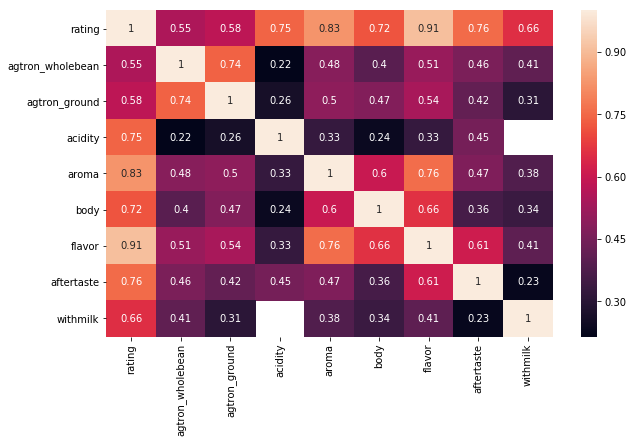

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(s.corr(), annot=True)

* It seems like the ratings in flavor, aroma, acidity and body have higher correlation with the overall rating. This correlation is in line with Coffee Review's global coffee community assumptions.

### Descriptive analysis by Location

In [41]:
df_location=t_new['location']
df_location.shape

(4860L,)

In [42]:
#drop duplicates for locations
df_l=df_location.drop_duplicates()
df_l.shape

(720L,)

* These 4860 coffee are from 720 locations.

In [45]:
# Extract roasters' location
t_new['state/other']=t_new['location'].str.extract('^.*,\s*(.*)',expand=False)
t_new['city']=t_new['location'].str.extract('(.*?),',expand=False)

In [46]:
# Display the state information
t_new['state/other'].head()

0      Colorado
1        Taiwan
2       Florida
3    California
4        Taiwan
Name: state/other, dtype: object

In [47]:
# How many U.S.coffee products had been evaluated?
t_new['state/other'].isin(['Alabama', 'Alaska', 'Arizona', 'Arkansas','California','Colorado','Connecticut'
                            ,'Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois'
                            ,'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts'
                             ,'Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada'
                             ,'New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota'
                            ,' Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina'
                            ,'South Dakota','Tennessee','Texas','Utah','Vermont',' Virginia','Washington'
                            ,'West Virginia','Wisconsin','Wyoming']).value_counts()

True     3807
False    1053
Name: state/other, dtype: int64

* Around 80% of the reviews are for U.S. products.

In [48]:
# How many Kansas products had been evaluated?
t_new['state/other'].isin(['Kansas']).value_counts()

False    4743
True      117
Name: state/other, dtype: int64

* There are 117 types of coffee come from Kansas!

In [49]:
# Save Kansas coffee in a separate dataframe
t_new_kansas=t_new.groupby('state/other').get_group('Kansas')

In [50]:
t_new_kansas.head()

,Unnamed: 0,1,product,brand,rating,assessment,note,bottomline,location,origin,...,aroma,body,flavor,aftertaste,withmilk,link,review_year,rating_cutoff,state/other,city
22,22,"Product: Sumatra Tano Batak, u""Brand: PTs Cof...",Sumatra Tano Batak,"PTs Coffee Roasting""",94.0,"Floral, richly earth-toned. Lilac, black cherr...",This coffee tied for the second-highest ratin...,This rich Sumatra invokes the experience of e...,"Topeka, Kansas","Lintong growing region, North Sumatra Provinc...",...,9.0,9.0,9.0,8.0,NaN,True,2018.0,"[94, 96)",Kansas,Topeka
26,26,Product: Granja La Esperanza Sudan Rume Natur...,Granja La Esperanza Sudan Rume Natural,"PTs Coffee Roasting""",95.0,"Intensely pungent, richly vibrant, deeply swee...",Comprised entirely of beans from the rare Sud...,An adventurer\u2019s coffee from the get-go. ...,"Topeka, Kansas","Valle del Cauca growing region, Colombia",...,9.0,9.0,9.0,9.0,NaN,True,2018.0,"[94, 96)",Kansas,Topeka
101,101,Product: Blue Label La Esmeralda Porton Pascu...,Blue Label La Esmeralda Porton Pascua Gesha,"PTs Coffee Roasting""",95.0,"Richly sweet, crisply complex, spice-toned. Li...",Coffee from trees of the botanical variety Ge...,A symphonic Gesha cup: high-toned fruit and f...,"Topeka, Kansas","Boquete growing region, western Panama",...,9.0,9.0,9.0,9.0,NaN,True,2017.0,"[94, 96)",Kansas,Topeka
102,102,"Product: Auromar Gesha Natural, u""Brand: PTs ...",Auromar Gesha Natural,"PTs Coffee Roasting""",93.0,"Delicate, crisply sweet. Dried coconut, baker\...",Produced from trees of the rare Ethiopia-deri...,"A crisp, deeply sweet natural-processed Gesha...","Topeka, Kansas","Piedra Candela, Chiriqui Province, far wester...",...,8.0,9.0,9.0,8.0,NaN,True,2017.0,"[92, 94)",Kansas,Topeka
103,103,"Product: Haraz Special Red Yemen, u""Brand: PT...",Haraz Special Red Yemen,"PTs Coffee Roasting""",92.0,"Engaging, richly sweet-savory. Caramelized fig...","Haraz (also Haraaz, other spellings) is a cel...",An attractively idiosyncratic cup from one of...,"Topeka, Kansas","Haraz growing region, north-central Yemen",...,9.0,8.0,9.0,8.0,NaN,True,2017.0,"[92, 94)",Kansas,Topeka


In [51]:
# locations and brands for Kansas coffee
t_new_kansas_b=t_new_kansas[['brand','location']].drop_duplicates()
t_new_kansas_b

,brand,location
22,"PTs Coffee Roasting""","Topeka, Kansas"
414,"PTs Coffee Roasting Co.""","Topeka, Kansas"
704,Mother Earth Coffee,"Kansas City, Kansas"
1291,Alchemy,"Lawrence, Kansas"
4431,"PTs Coffee Roasting Co.""","Topeka, Kansas"


* Notice that there are some duplicates for the brands, so we need to keep deeper data cleaning.

In [52]:
t_new_kansas['brand']=t_new_kansas['brand'].str.replace('PTs Coffee Roasting"|PTs Coffee Roasting Co."|PTs Coffee Roasting Co."','PTs Coffee Roasting')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


* Kansas coffee comes from PTs Coffee Roasting (Tokepa), Mother Earth Coffee (Kansas City), and Alchemy (Lawrence).

In [54]:
# Display the averages of coffee characterisitcs of Kansas coffee by brands.
t_new_kansas.groupby('brand').mean()

,Unnamed: 0,rating,agtron_wholebean,agtron_ground,acidity,aroma,body,flavor,aftertaste,withmilk,link,review_year
brand,,,,,,,,,,,,
PTs Coffee Roasting,2285.026316,92.131579,54.63964,73.711712,8.833333,8.451327,8.159292,8.681416,8.242991,8.2,0.991228,2010.666667
Alchemy,1291.000000,92.000000,NaN,NaN,NaN,NaN,8.000000,9.000000,8.000000,9.0,1.000000,2014.000000
Mother Earth Coffee,704.500000,90.500000,52.00000,65.000000,NaN,8.000000,8.500000,8.000000,7.500000,9.0,1.000000,2016.000000


Ranking by the means:
* The overall rating: PT's > Alchemy > Mother Earth 
* Body: Mother Earth > PT's > Alchemy
* Falvor: Alchemy > PT's > Mother Earth
* Aftertaste: PT's > Alchemy > Mother Earth

In [55]:
# How many Missouri products had been evaluated?
t_new['state/other'].isin(['Missouri']).value_counts()

False    4780
True       80
Name: state/other, dtype: int64

* There are 80 products come from Missouri.

In [56]:
# How many Missouri products had been evaluated?
t_new_missouri=t_new.groupby('state/other').get_group('Missouri')
t_new_missouri.head()

,Unnamed: 0,1,product,brand,rating,assessment,note,bottomline,location,origin,...,aroma,body,flavor,aftertaste,withmilk,link,review_year,rating_cutoff,state/other,city
648,648,"Product: Brazil Fazenda Do Serrado, Brand: Pa...",Brazil Fazenda Do Serrado,Parisi Artisan Coffee,92.0,"Complex, sweetly spice-toned. Vanilla paste, c...","Produced by the Jose Antonio Pereira Estate, ...",A sweetly spice-driven coffee with the inviti...,"Kansas City, Missouri","Carmo de Minas growing region, northeastern M...",...,9.0,8.0,9.0,8.0,NaN,True,2016.0,"[92, 94)",Missouri,Kansas City
1130,1130,"Product: Kenya Kia Kiamarigo AA, Brand: Paris...",Kenya Kia Kiamarigo AA,Parisi Artisan Coffee,92.0,"Intense, pungent, arresting. Honey, sweetly ta...","Produced mainly from trees of the admired, Bo...",Those who enjoy the peculiar intensity of cer...,"Kansas City, Missouri","Nyeri growing region, south-central Kenya.",...,8.0,8.0,9.0,8.0,NaN,True,2014.0,"[92, 94)",Missouri,Kansas City
1131,1131,"Product: Parisi Espresso, Brand: Parisi Artis...",Parisi Espresso,Parisi Artisan Coffee,91.0,Evaluated as espresso. Zesty and rich-toned. C...,Parisi Artisan Coffee is the specialty coffee...,The lively persistence in milk may attract ca...,"Kansas City, Missouri",Not disclosed.,...,8.0,9.0,8.0,8.0,8.0,True,2014.0,"[90, 92)",Missouri,Kansas City
1226,1226,"Product: Ethiopia Yirgacheffe Gutiti, Brand: ...",Ethiopia Yirgacheffe Gutiti,Parisi Artisan Coffee,93.0,"Crisp, exhilaratingly floral. Dry, cocoa-like ...",Yirgacheffe is a coffee region in southern Et...,Those who enjoy a dramatically aromatic and c...,"Kansas City, Missouri","Gedeo Zone, Yirgacheffe growing region, south...",...,9.0,8.0,10.0,8.0,NaN,True,2014.0,"[92, 94)",Missouri,Kansas City
1227,1227,"Product: Kenya Ruarai AB, Brand: Parisi Artis...",Kenya Ruarai AB,Parisi Artisan Coffee,93.0,"Complex, elegant, intense. Honey, lavender, ro...","Grown by members of the Ruthaka Cooperative, ...",Fine example of the great Kenya profile: comp...,"Kansas City, Missouri","Nyeri growing region, south-central Kenya.",...,9.0,8.0,9.0,9.0,NaN,True,2014.0,"[92, 94)",Missouri,Kansas City


In [57]:
# locations and brands for Missouri coffee
t_new_missouri_b=t_new_missouri[['brand','location']].drop_duplicates()
t_new_missouri_b

,brand,location
648,Parisi Artisan Coffee,"Kansas City, Missouri"
1328,Blueprint Coffee,"St. Louis, Missouri"
1678,The Roasterie,"Kansas City, Missouri"
2364,"Kaldis Coffee""","St. Louis, Missouri"
2500,"Kaldis Coffee Roasting""","St. Louis, Missouri"
4350,The Roasterie,"Kansas City, Missouri"


In [58]:
t_new_missouri['brand']=t_new_missouri['brand'].str.replace('The Roasterie|The Roasterie','The Roasterie')
t_new_missouri['brand']=t_new_missouri['brand'].str.replace('Kaldis Coffee Roasting"|Kaldis Coffee"','Kaldis Coffee Roasting')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
t_new_missouri.groupby('brand').mean()

,Unnamed: 0,rating,agtron_wholebean,agtron_ground,acidity,aroma,body,flavor,aftertaste,withmilk,link,review_year
brand,,,,,,,,,,,,
Kaldis Coffee Roasting,2913.875000,90.500000,49.250000,63.625000,NaN,8.250000,7.750000,8.375000,7.857143,8.500000,1.000000,2009.000000
Blueprint Coffee,1430.666667,92.333333,58.666667,76.333333,NaN,8.500000,8.666667,8.666667,8.333333,8.000000,1.000000,2013.666667
Parisi Artisan Coffee,1744.000000,90.666667,52.333333,65.250000,NaN,8.333333,8.000000,8.500000,7.750000,8.000000,1.000000,2012.750000
The Roasterie,3418.614035,90.017544,44.240741,58.611111,NaN,8.140351,7.614035,8.192982,7.878049,8.333333,0.929825,2006.333333


Ranking by the means:
* The overall rating: Blueprint > Kaldis > Parisi Artisan > The Roasterie
* Aroma: Blueprint > Parisi Artisan > Kaldis > The Roasterie
* Body: Blueprint > Parisi Artisan Coffee > Kaldis > The Roasterie
* Flavor: Blueprint > Parisi Artisan > Kaldis > The Roasterie
* Aftertaste: Blueprint > Kaldis > Parisi Artisan > The Roasterie

## Content analytics

In [60]:
# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  

C:\ProgramData\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [61]:
#save assessments in a separate csv
assess=t_new['assessment']
assess.to_csv("coffeeassessment.csv", encoding='utf-8')

In [62]:
#import data
texts = []
r = csv.reader(open('coffeeassessment.csv', 'rb'))
for i in r:
    texts.append(i)  
len(texts)

4860

In [63]:
#first two rows
texts[0:2]

[['0',
  'Resonant, sweet-savory, original. Baker\\u2019s chocolate, fragrant fresh-cut cedar, green grape, almond, wisteria in aroma and cup. Roundly tart, sweetly savory in structure; plushly syrupy mouthfeel. Flavor, particularly green grape and flowers, carries into a drying finish.'],
 ['1',
  'Deeply sweet, richly earth-toned. Dark chocolate, candy cap mushroom, gardenia, black cherry, grapefruit zest in aroma and cup. Balanced, sweet-savory-tart structure with vibrant acidity; full, syrupy mouthfeel. The crisp, flavor-saturated finish centers around sweet fruit and floral notes and an intriguing savory inclination.']]

In [64]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]

# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]

#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]


In [65]:
# A list of extra stopwords specific to the coffee
extra_stopwords = ['coffee', 'cup', 'need','going', 'can', 'lot', 'get','make',
                'say','got','said','just','something','now','back','want','right',
                'many','along','also','much','let', 'would','does', 'give', 'look', 'one']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]

In [66]:
## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('coffee.dict')  # store the dictionary, for future reference

len(dictionary)

5207

In [67]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) 
dictionary.filter_extremes(no_below=5, no_above=0.5)
len(dictionary)

1682

In [68]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('coffee.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

4860

In [69]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1682
Number of documents: 4860


In [70]:
# later you can retrive the saved dict and corpus
saved_dict = dictionary.load('coffee.dict')

### LDA model building

In [71]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=20, eval_every = 1)

In [72]:
# save model
model.save('lda_coffee.model')

### Prints the topics.

In [73]:
model.show_topics(num_topics=15)

[(0,
  u'0.049*"ken" + 0.030*"found" + 0.020*"panelist" + 0.017*"flavor" + 0.014*"willem" + 0.013*"cupping" + 0.010*"note" + 0.010*"another" + 0.009*"taster" + 0.009*"sample"'),
 (1,
  u'0.042*"dark" + 0.040*"hint" + 0.035*"syrupy" + 0.031*"rich" + 0.028*"flower" + 0.023*"toned" + 0.023*"deep" + 0.023*"lightly" + 0.020*"cedar" + 0.018*"round"'),
 (2,
  u'0.070*"taste" + 0.040*"nut" + 0.037*"subdued" + 0.037*"sweetness" + 0.033*"clean" + 0.028*"sensation" + 0.022*"mild" + 0.021*"hard" + 0.020*"nose" + 0.020*"quickly"'),
 (3,
  u'0.049*"smoky" + 0.045*"sweetness" + 0.045*"pungency" + 0.043*"tone" + 0.038*"profile" + 0.035*"roast" + 0.034*"rather" + 0.027*"nuance" + 0.025*"without" + 0.025*"vanilla"'),
 (4,
  u'0.042*"flower" + 0.032*"toned" + 0.030*"hint" + 0.028*"silky" + 0.028*"lemon" + 0.024*"flavor" + 0.022*"cocoa" + 0.022*"balanced" + 0.021*"note" + 0.021*"delicate"'),
 (5,
  u'0.039*"aftertaste" + 0.026*"sweetness" + 0.023*"floral" + 0.022*"cupper" + 0.022*"note" + 0.021*"tone" + 0

In [74]:
# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

ken, found, panelist, flavor, willem, cupping, note, another, taster, sample
dark, hint, syrupy, rich, flower, toned, deep, lightly, cedar, round
taste, nut, subdued, sweetness, clean, sensation, mild, hard, nose, quickly
smoky, sweetness, pungency, tone, profile, roast, rather, nuance, without, vanilla
flower, toned, hint, silky, lemon, flavor, cocoa, balanced, note, delicate
aftertaste, sweetness, floral, cupper, note, tone, enough, like, kenya, dry
note, fruit, toned, astringent, rich, roasty, rather, slightly, dry, pungent
cool, tone, fruit, however, ferment, sharp, full, rating, nuance, bit
toned, syrupy, sweetly, flavor, tart, nib, richly, long, roasted, cacao
acidy, toned, bodied, fruit, little, flat, high, tone, side, classic
roast, dark, body, carbon, profile, call, complex, sweetness, touch, tone
milk, fruit, small, espresso, note, part, toned, evaluated, hint, flavor
ounce, brewed, single, brewing, serve, device, keurig, capsule, using, serving
tobacco, pipe, apple, note, ea

## Network Analysis of  'Co-origins' for all coffees

* Generate network graphs using information of origins of each coffee.
* Notice that some coffee might have multiple coffee origins. Say, origins of coffee 1 are Yirgacheffe growing region and south-central Ethiopia. Coffee 2's origins are  Gedeb District, Gedeo Zone and southern-central Ethiopia.
* Coffee 1 and coffee 2 has the one common origin which is southern-central Ethiopia (the co-origin in this case)
* We use the idea of 'co-origin' to build the network analytics.

In [78]:
origin=t_new['origin'].str.split(',|;', expand=True)
origin.head()

,0,1,2,3,4,5,6
0,Rwanda,None,None,None,None,None,None
1,Lintong growing region,North Sumatra Province,Indonesia,None,None,None,None
2,Kayanza,Kabuye,Burundi,None,None,None,None
3,Per,None,None,None,None,None,None
4,Yirgacheffe growing region,south-central Ethiopia,None,None,None,None,None


In [79]:
origin.to_csv("coffeeorigin.csv", encoding='utf-8')

### Metrics

* Average degree=1.568
* Average weighted degree=4.169
* Network diameter=14
* Graph density=0.003
* Modularity=0.816
* Average clustering coefficient=0.23
* Average path length=4.676

### Network Analytic Graphs (layout=Yifan Hu)

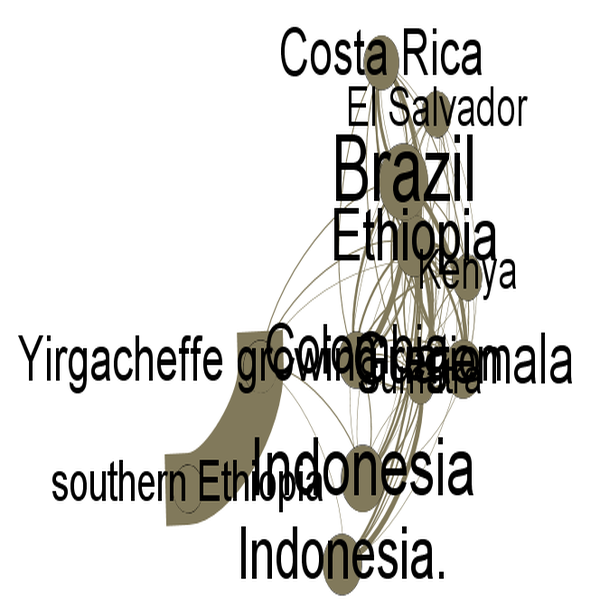

In [87]:
# Max>Degree is  filtered by [31,max=71]
from PIL import Image
im=Image.open('Degree.png')
new_width  = 600
new_height = 600
img = im.resize((new_width, new_height), Image.ANTIALIAS)
img

* It seems like Brazil, Ethiopia, Indonesia have very high degrees.
* Alert: Not sure why there are two 'Indonesia'. The data maybe need more data cleanning later on.

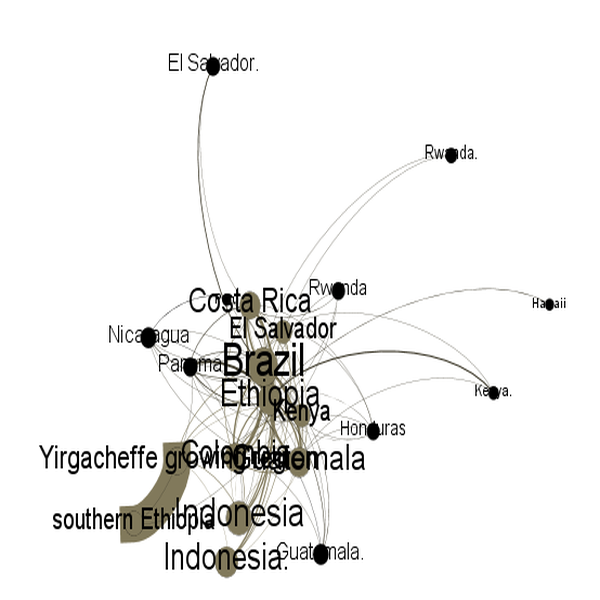

In [88]:
# Betweenness Centrality is filtered by [267,max=5723]
im2=Image.open('Betweenness.png')
new_width2  = 600
new_height2 = 600
img2 = im2.resize((new_width2, new_height2), Image.ANTIALIAS)
img2

*Similar rankings by betweenness centrality.

# Final analysis & storytelling

* The overall rating of coffee in Coffee Review is based on sensory evaluation on the coffee's aroma, body, flavor, aftertaste, with milk, etc. According to the correlation table, we find that flavor and aroma have much higher correlation compared with other characteristics. Among all characteristics, agtron (wholebean and groud) are least important for the rating.

* The descriptive statistics by location show that the majority (around 80%) of the coffee reviews are on U.S.products. In the U.S. sample, we find that there are 117 coffee reviews on Kansas coffee and 80 reviews on Missouri coffee. Kansas coffee are mainly from 3 brands: PTs Coffee Roasting, Alchemy, and Mother Earth Coffee. These brands are located at Topeka, Lawrence and Kansas City. Among Kansas brands, it seems like PT's coffee are rated highest among these three. The Missouri coffee are concentrated in 4 brands: Blueprint Coffee, Kaldis Coffee Roasting, Parisi Artisan Coffee, and The Roasterie. Blueprints get highest grades in most of coffee characteristics (except with milk). Kaldis and Parisi Artisan Coffee have very similar grades which rank second and the third. The Roasterie ranks the fourth in Missouri sample. Similar to Kansas coffee, Missouri coffee also come from relative large cities: Kansas City, St.Louis. 

* The topic modeling in blind assessment suggests that the topics are all related to coffee's aroma, acidity, flavor sensenation words such as "syrupy", "rich", "toned", "astringent", "sweetness".

* In the last part, I use the information on the coffee origin to build the social network of coffee. I borrow the idea of 'co-hastags' from Twitter analytics and apply in this analysis for coffee. In my definition, if two coffee have common coffee origins, then they are related. According to the degree measure, coffee origins' degree is in the range of 1 through 70. This suggests that some coffee origins are very diverse. Some coffee origins might be vey popular. In the first social network graph, I rank origins by degree and keep the origins which have more than 30 degrees. Many popular coffee are originated from South America countries such as Brazil,  Costa Rica, El Salvado, Guatemala; African countries such as Ethiopia (Yirgacheeffe, Southern Ethiopia), Kenya; and Asian countries such as Indonesia. The second social network graph which is ranked by betweenness centrality have very similar result as the first graph.

# References

* http://nbviewer.jupyter.org/github/joshbarlow3835/Final-Project/blob/master/Lin_Barlow_Group_Capstone_Project.html
* http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf